In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb as nCr

def binomial_pdf(n,p,k):
    y = nCr(N=n,k=k)*(p**k)*((1-p)**(n-k))
    return y

In [24]:
'''Create a pandas DataFrame with 52 entries, each repesenting a card by its suit, value, and color'''

suits = ['Hearts','Spades','Diamonds','Clubs']
colors = ['Red','Black']
values = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']

deck= []
for suit in suits:
    for value in values:
        if suit in ['Hearts','Diamonds']:
            card = [suit,value,'Red']
        else:
            card = [suit,value,'Black']
        deck.append(card)
myDeck = pd.DataFrame(deck, columns = ['Suits','Value','Color'])
myDeck

,Suits,Value,Color
0,Hearts,A,Red
1,Hearts,2,Red
2,Hearts,3,Red
3,Hearts,4,Red
4,Hearts,5,Red
5,Hearts,6,Red
6,Hearts,7,Red
7,Hearts,8,Red
8,Hearts,9,Red
9,Hearts,10,Red


- Now let's see how the deck behaves in accordance with the Binomial distribtion.  As a first case, let's assume we draw ten cards at random, replacing the card after each draw.
- Let's ask: How many hearts can I expect to draw in a ten card draw?

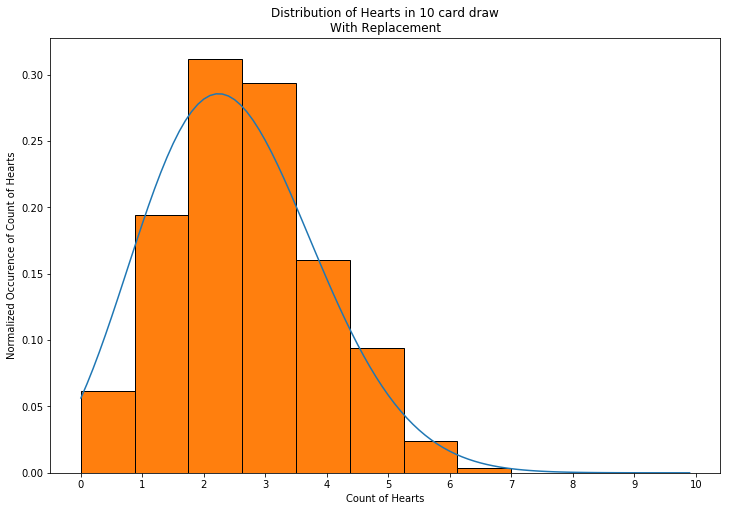

In [149]:
ndraws = 1000

draw_size = 10
p_event = 0.25 # probability of drawing a heart

experiment = []
for trial in range(ndraws):
    draw = np.random.randint(low=0,high=52,size=draw_size)
    result = []
    for card in draw:
        result.append(list(myDeck.iloc[card]))
    result = pd.DataFrame(result, columns = ['Suits','Value','Color'])

    nHearts= 0
    if 'Hearts' in result.Suits.values:
        nHearts = result.groupby('Suits').count().loc['Hearts']['Value']

    experiment.append(nHearts)


    
    
    
x_space = [x/10 for x in list(range(0,100))];
y = [binomial_pdf(n=draw_size, p=p_event, k=x) for x in x_space]


fig,ax = plt.subplots(figsize=(12,8))

ax.plot(x_space,y)
ax.hist(experiment, bins= 8, normed=True, edgecolor='black')
ax.set_title('Distribution of Hearts in 10 card draw\nWith Replacement')
ax.set_xticks(range(0,11))
ax.set_xlabel('Count of Hearts')
ax.set_ylabel('Normalized Occurence of Count of Hearts')
plt.show()

- Now let's consider a different situation: we draw 100 cards with replacement, and ask: how many aces can we expect in this draw?

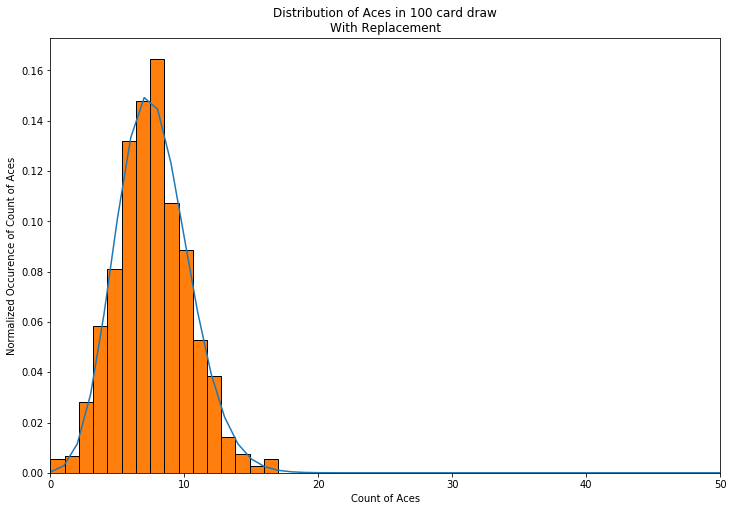

In [148]:
ndraws = 1000

draw_size = 100
p_event = 1/13 # probability of drawing a heart

experiment = []
for trial in range(ndraws):
    draw = np.random.randint(low=0,high=52,size=draw_size)
    result = []
    for card in draw:
        result.append(list(myDeck.iloc[card]))
    result = pd.DataFrame(result, columns = ['Suits','Value','Color'])

    nAces= 0
    if 'A' in result.Value.values:
        nAces = result.groupby('Value').count().loc['A']['Suits']

    experiment.append(nAces)
    

x_space = [x for x in list(range(0,100))];
y = [binomial_pdf(n=draw_size, p=p_event, k=x) for x in x_space]

fig,ax = plt.subplots(figsize=(12,8))

ax.plot(x_space,y)
ax.hist(experiment, bins= 16, normed=True, edgecolor='black')
ax.set_title('Distribution of Aces in 100 card draw\nWith Replacement')
ax.set_xlabel('Count of Aces')
ax.set_ylabel('Normalized Occurence of Count of Aces')
ax.set_xlim([0,50])

plt.show()